<a href="https://colab.research.google.com/github/xeqoir/Data-Science/blob/main/Unit6/YaleXie_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

**Answer1:**

No. elpd_loo is only useful if we are trying to *compare* two or more models, in which case a greater (more positive) elpd_loo would indicate a better model.

**Task2**:

Describe overfitting, in the context of this course

**Answer2:**

Overfitting is an error where the model takes the observed data *too much* into account. This will cause the model to be unable to make accurate predictions outside the observed data due to distractions like excessive variables.

**Task3**:

How do we mitigate overfitting?

**Answer3:**

To mitigate overfitting or at least reduce overfitting, you should include weak (regularizing) priors and reduce the number of variables. Weakly informative/regularizing priors act as constraints, constraining the effect the observed data has on the model. Using fewer variables similarly constrains the model by not allowing it to adapt to random quirks in the observed data (that don't make sense to overfit to). We can also use causal diagrams to mitigate overfitting (somehow), according to Mr. Arredondo.

**Task4**:

How do we mitigate underfitting?

**Answer4:**

To mitigate underfitting, you should use elpd_loo to pick between multiple models. When comparing multiple models, you should pick the model with the highest (most positive) elpd_loo to make the model as accurate as possible (reduce underfitting). We can also use causal diagrams to mitgate underfitting (somehow), according to Mr. Arredondo.

**Task5**:

Why would we want more than one predictor in a model?

**Answer5:**

We might want more than one predictor in a model if there are multiple factors that affect the response (dependent) variable. The more *useful* predictors we include, the higher elpd_loo will be and the better the model will be in comparison to other models with less predictors.

**Task6**:

Can we have too many predictors? How would we know?

**Answer6:**

It's definitely possible to have too many predictors. An excess number of predictors can lead to overfitting (see Task 2 and Task 3), a problem where the model cannot make accurate predictions outside the observed data. You can tell if a model is overfitting by seeing if it predicts test data outside the observed data well. If it doesn't, the problem could be overfitting (Amazon Web Services). We can also use causal diagrams to determine this (somehow), according to Mr. Arredondo.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of picking useful predictors for a model. It seeks to answer a few questions like...

- Do we need multiple predictors?
- How many do we need?
- Which ones?
- Are some better than others?
- Why?

(Arredondo)

Variable selection works by creating various models with different combinations of predictors and comparing their elpd_loos with each other to find out which one is best. It's generally advisable to just create the first model with all the predictors you can and go from there.

Causal diagrams are a good way to do variable selection too because they allow you to visualize everything in an organized way, including whether the predictors are connected within themselves in some way.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

**Answer8:**

In a linear regression with two predictors (one categorical variable and one quantitative variable), adding the variables in the model (standard) results in a model with multiple intercepts (for each of the categories) but a single common slope, called the **global slope**. There was also a way that would allow for different slopes using this method, but it was not explored in this particular unit (Arredondo).

Using that categorical variable as a hierachy upon the other predictor variable changes the model: instead of having a single common slope for each of the categories, they have different slopes while retaining different intercepts. This is because hierarchical models allow the slopes to interact with each other within a certain range of the **global slope** which means that they have limited flexibility in that range.

Adding the variables, plus the categorical variable's interaction with the other variable also changes the model: in this case, the amount of freedom is the greatest. There is **no global slope** for these slopes to be based on though each slope is affected by each other, making it slightly less free than running completely separate linear regressions for each category. This case is where the slopes are as different from each other as possible (of these 3).

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

**Answer9:**

We can visualize multiple linear regression models by creating multiple plots and extending into 3D. It is not possible to visualize the entire model of 3+ predictor models all at once because our visualization is limited to 3D (so at max we can simultaneously see 2 predictors and 1 response variable). Causal diagrams are also simple ways to visualize multiple linear regression models, though they don't have as much  specific information as "slices" of the model with 2 variables at a time.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [23]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

In [24]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-plmk43u9
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-plmk43u9
  Resolved https://github.com/pydata/xarray.git to commit 5279bd15708e21ea582e56e4f27fc3e9663a8509
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [25]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [26]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

**Predictors free throw percentage and position (with position as a categorical predictor)**

In [27]:
#define the model
model_basketball = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
#fit the model
idata_basketball = model_basketball.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

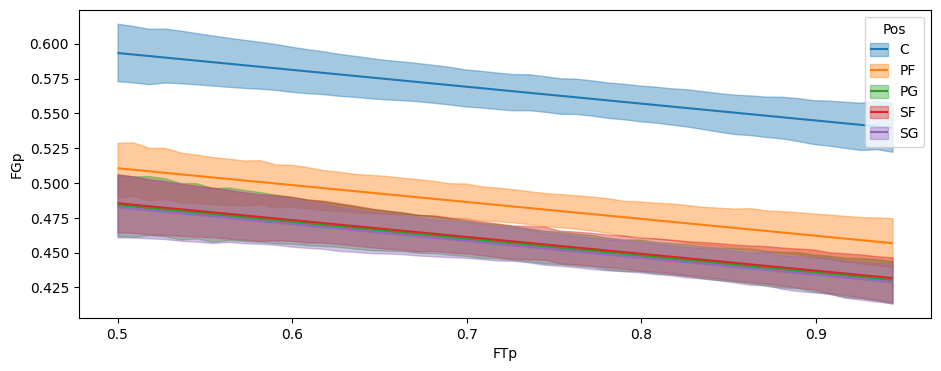

In [28]:
#plot 94% HDIs of the means of each position
bmb.interpret.plot_predictions(model_basketball,
                               idata_basketball,
                                ["FTp",  "Pos"], fig_kwargs={"figsize":(11, 4)})

**Predictors free throw percentage and position (with position as a hierarchy)**

In [29]:
#define the model, but as a hierarchy
model_basketball_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
#create the model
idata_basketball_h = model_basketball_h.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 13 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

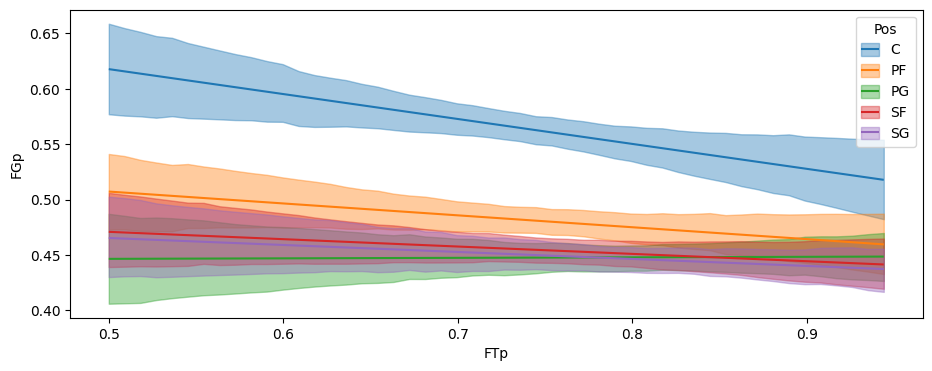

In [30]:
bmb.interpret.plot_predictions(model_basketball_h,
                               idata_basketball_h,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

**Predictors free throw percentage and position (with position interacting with frew throw percentage)**

In [31]:
#define the model; bb_interq stands for baskeball interaction quantiative
model_bb_interq = bmb.Model("`FGp` ~ `FTp` + `3PA` + `FTp`:`3PA`", data=bb)
#create the model
idata_bb_interq = model_bb_interq.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

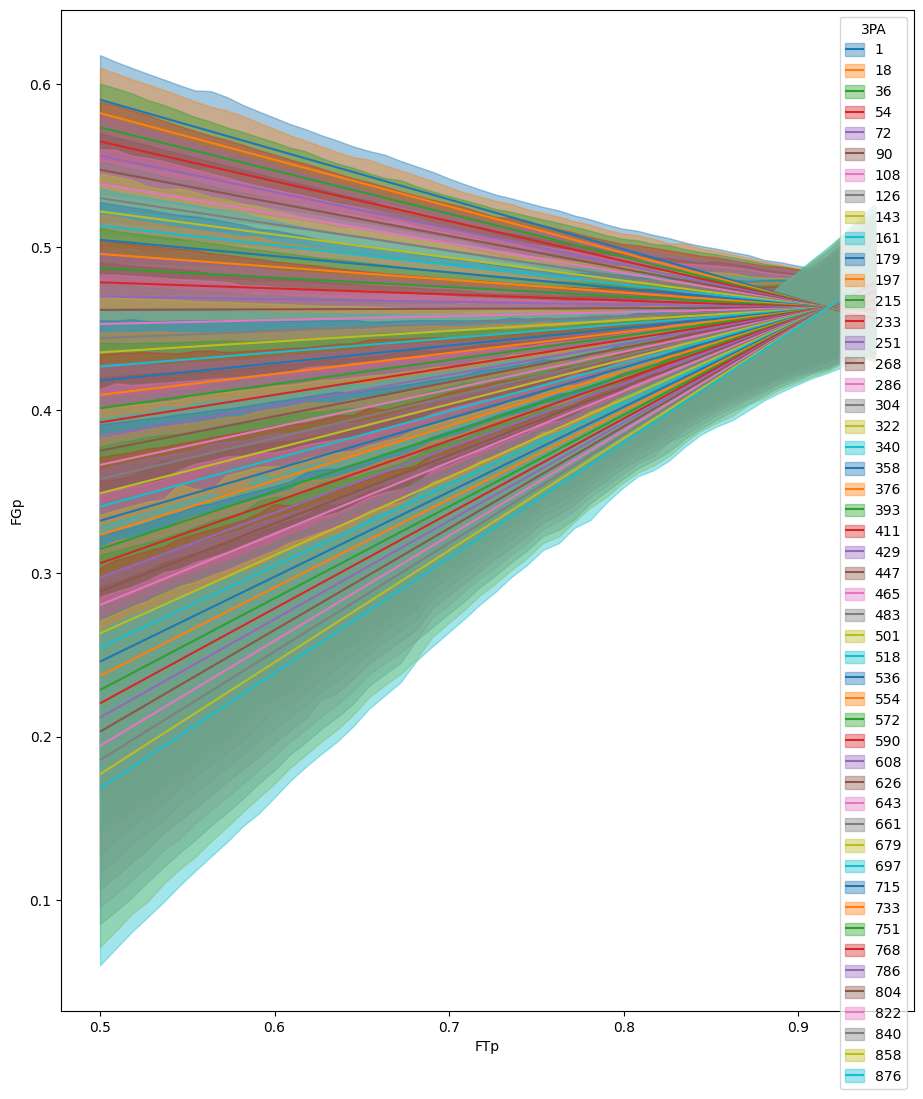

In [32]:
bmb.interpret.plot_predictions(model_bb_interq,
                               idata_bb_interq,
                               ["FTp","3PA"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

**Predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors**

In [42]:
model_bb_4 = bmb.Model("`FGp` ~ `FTp` + `3PA` + `Pos` + `FTp`:`3PA` + `FTp`:`Pos` + `3PA` : `Pos`", data=bb)
#create the model
idata_bb_4 = model_bb_4.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

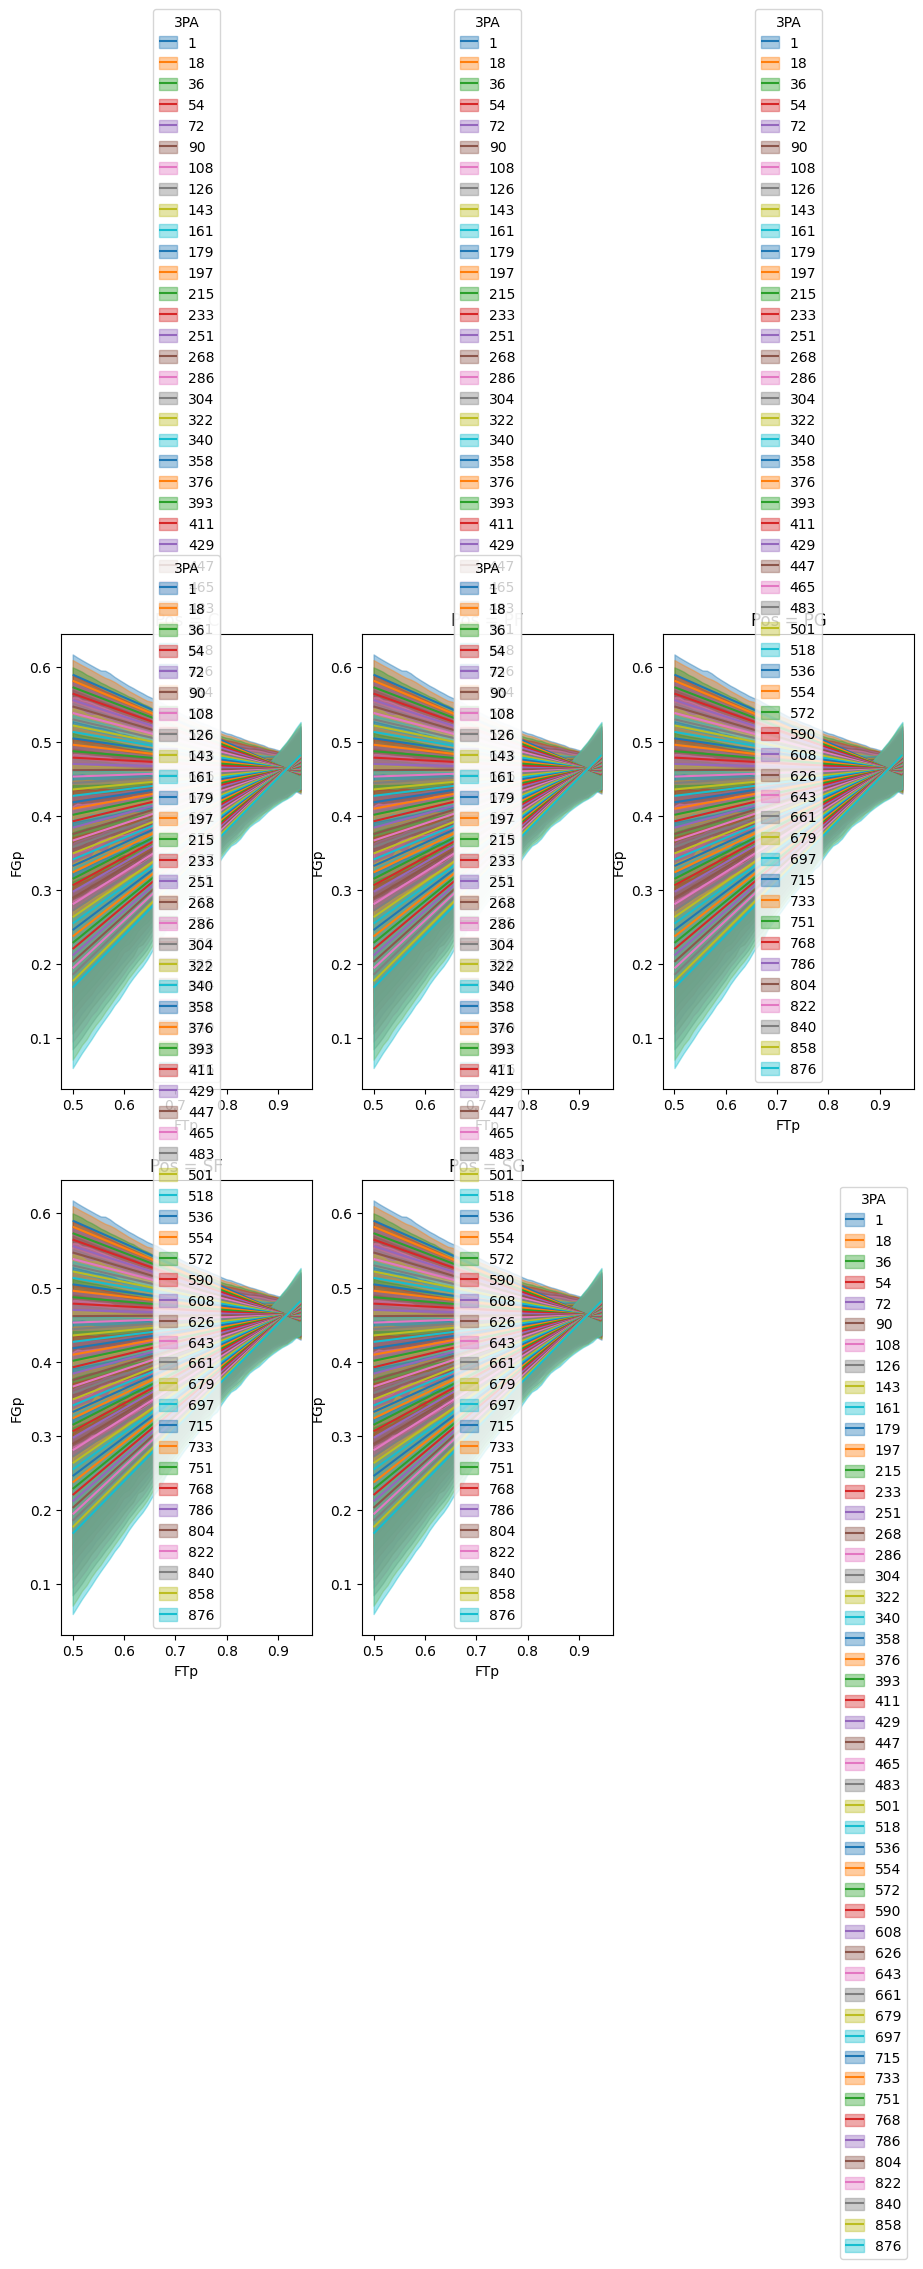

In [43]:
bmb.interpret.plot_predictions(model_bb_interq,
                               idata_bb_interq,
                               ["FTp","3PA","Pos"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

**Predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion**

In [40]:
model_bb_5 = bmb.Model("`FGp` ~ `FTp` + `3PA` + `Pos` + `3PA` : `Pos`", data=bb)
#create the model
idata_bb_5 = model_bb_5.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

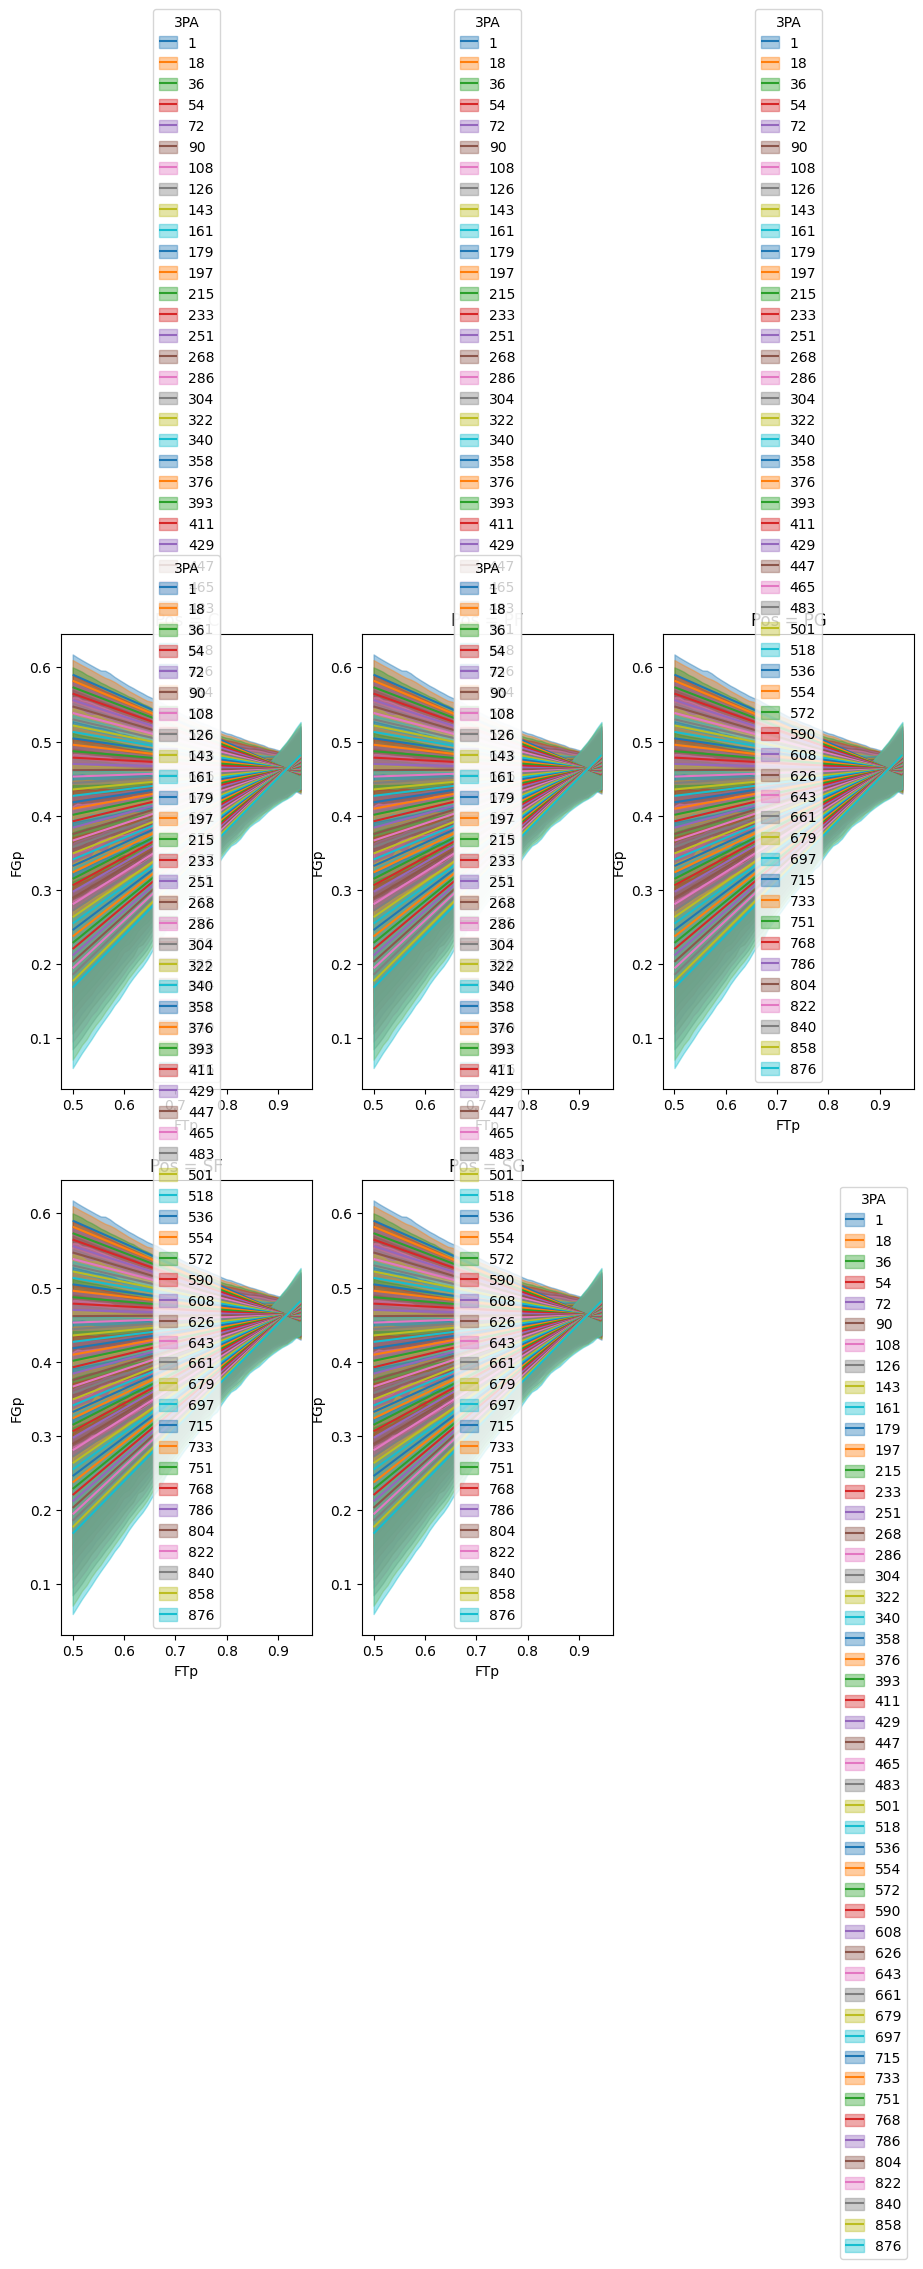

In [41]:
bmb.interpret.plot_predictions(model_bb_interq,
                               idata_bb_interq,
                               ["FTp","3PA","Pos"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

**Comparison**

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

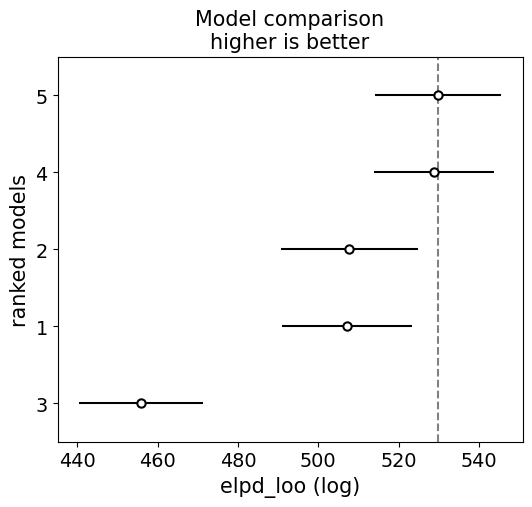

In [44]:
cmp = az.compare({"1":idata_basketball,"2":idata_basketball_h, "3":idata_bb_interq, "4":idata_bb_4, "5": idata_bb_5})
az.plot_compare(cmp)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

According to the elpd_loo metric, #5, or the model with an interaction with 3PA and Pos is the best, barely beating out #4, the model with interactions between all predictors. I think #5 and #4 outperformed the rest because 3PA and position have an *actual* relationship, while FTp and Pos (in #3) don't have as much as a relaationship, making an interaction less helpful.